In [1]:
#pip install sidetable
#pip install scikit-learn

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df = pd.read_csv("data/insurance.csv", index_col = 0)
df.head()

,sex,smoker,region,age,bmi,children,charges
0,female,yes,southwest,19.000000,27.900,0.0,16884.92400
1,male,no,southeast,18.000000,33.770,1.0,1725.55230
2,male,no,southeast,28.000000,33.000,3.0,4449.46200
3,male,no,northwest,33.000000,22.705,0.0,21984.47061
4,male,no,northwest,39.171927,28.880,0.0,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       1338 non-null   object 
 1   smoker    1338 non-null   object 
 2   region    1338 non-null   object 
 3   age       1338 non-null   float64
 4   bmi       1338 non-null   float64
 5   children  1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 83.6+ KB


### Variable respuesta

c:\Users\FOZ\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


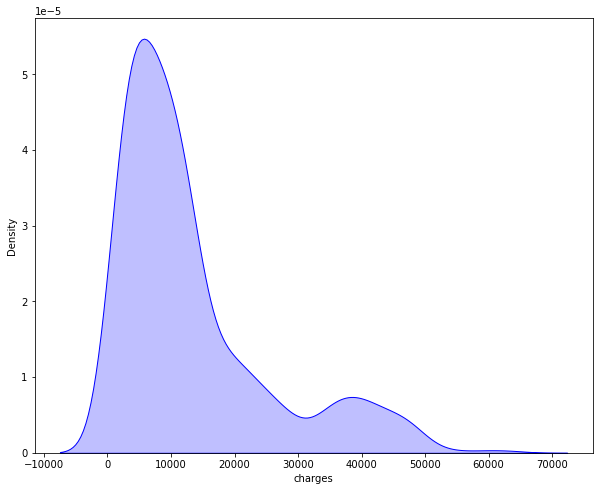

In [47]:
sns.distplot(
    df.charges, 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

In [11]:
df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.171927,13.332170,18.0000,28.00000,39.171927,50.000000,64.00000
bmi,1338.0,30.671933,6.077385,15.9600,26.31500,30.400000,34.595000,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000000,2.000000,5.00000
charges,1338.0,13273.160228,12109.976231,1121.8739,4740.28715,9382.033000,16639.912515,63770.42801


### Variables predictoras

#### Variables numéricas

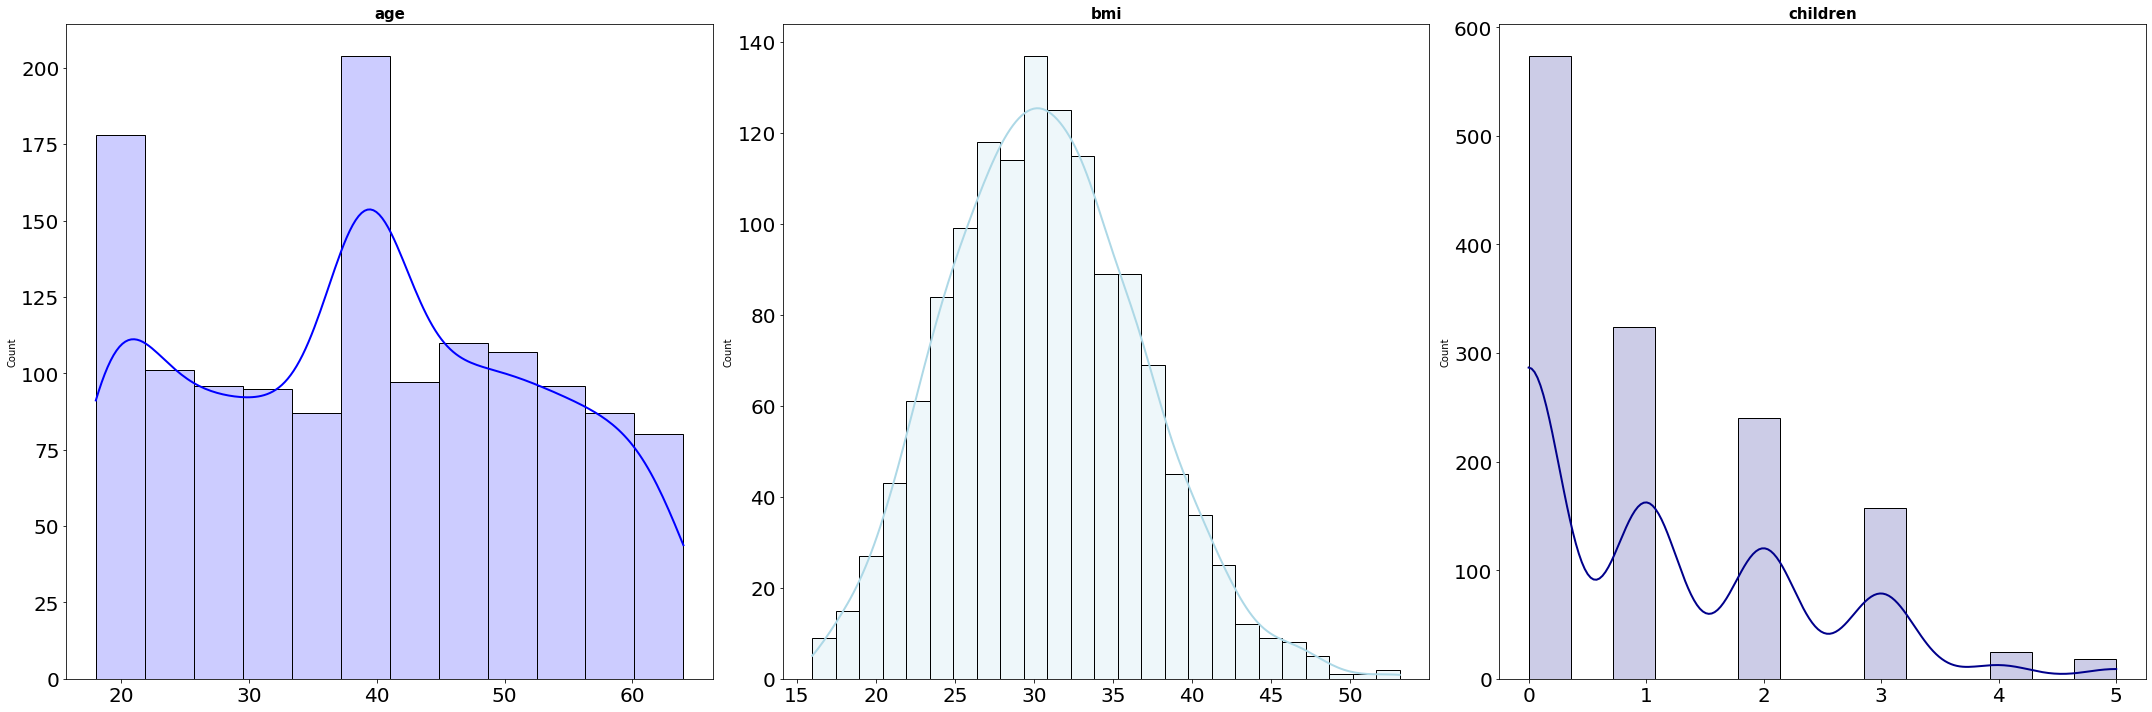

In [72]:
# Gráfico de distribución para cada variable numérica


fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "lightblue", "darkblue"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

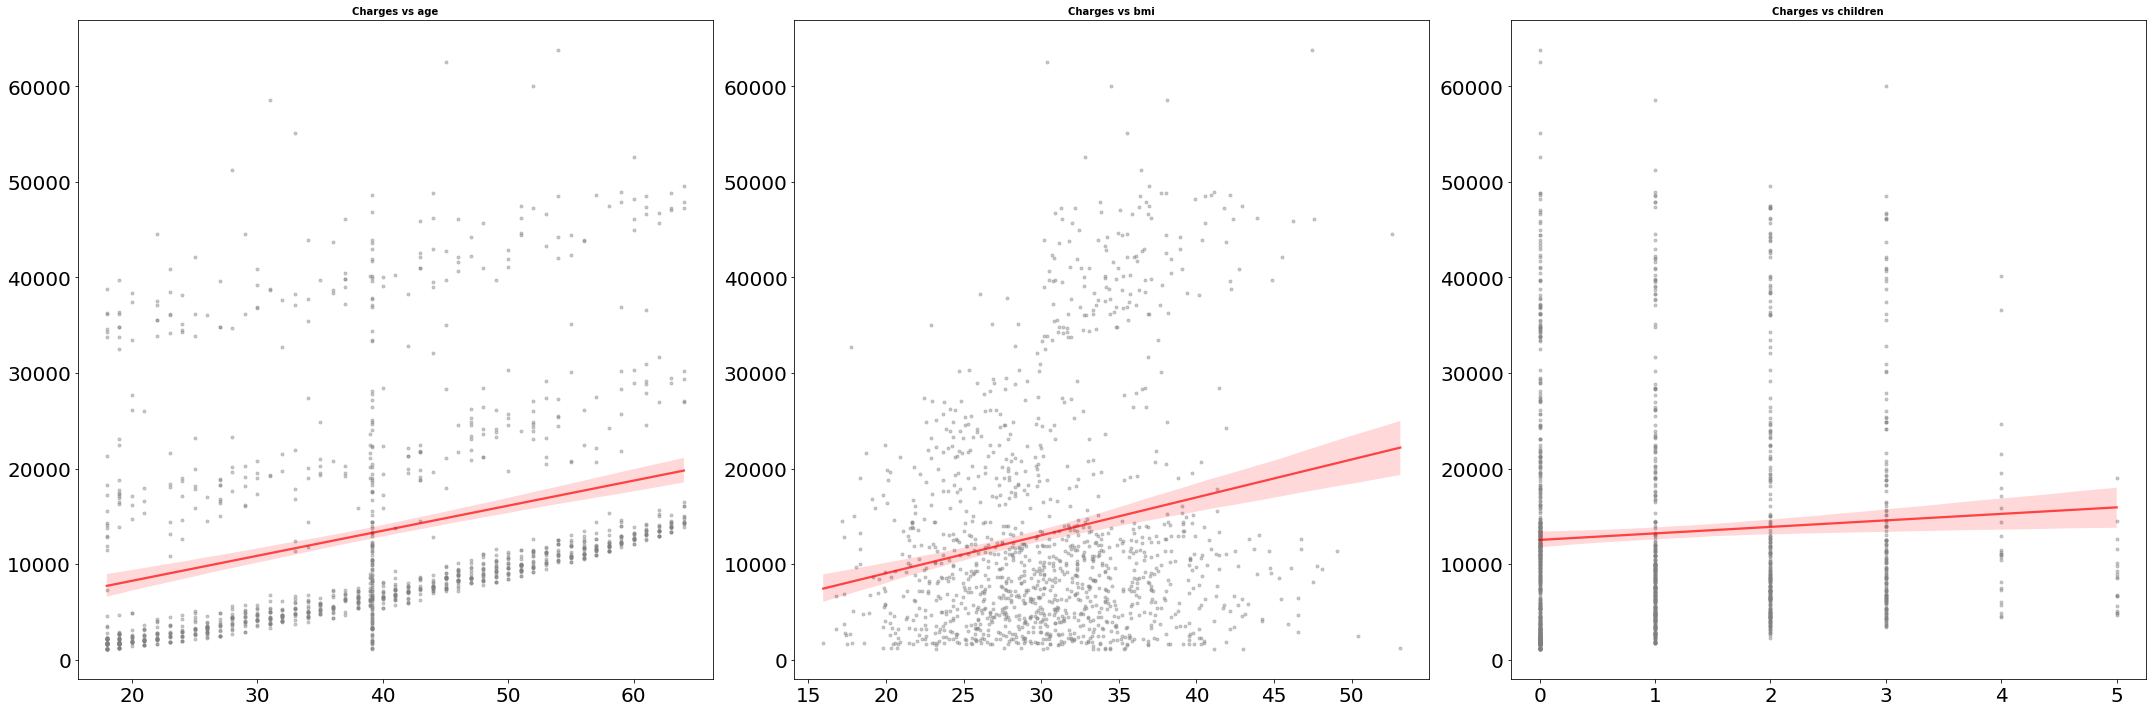

In [48]:
# Gráfico de relación entre variables predictoras y la variable a predecir


fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Charges vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

##### Correlación entre variables numéricas

C:\Users\FOZ\AppData\Local\Temp\ipykernel_34092\839317414.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))


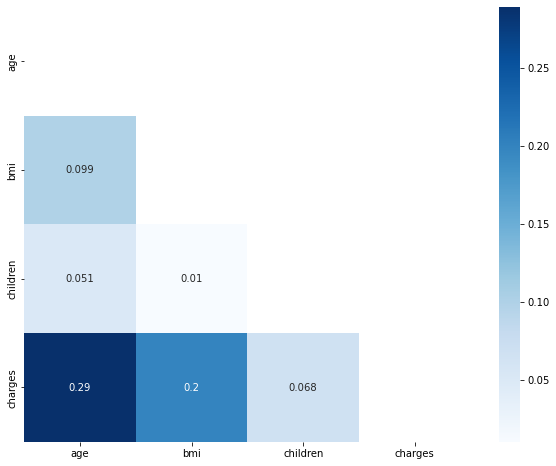

In [70]:
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))

sns.heatmap(df.corr(), 
           cmap = "Blues",
           mask = mask, 
           annot = True);

In [50]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.098692,0.051256,0.288835
bmi,0.098692,1.000000,0.010439,0.199266
children,0.051256,0.010439,1.000000,0.067800
charges,0.288835,0.199266,0.067800,1.000000


#### Variables no numéricas

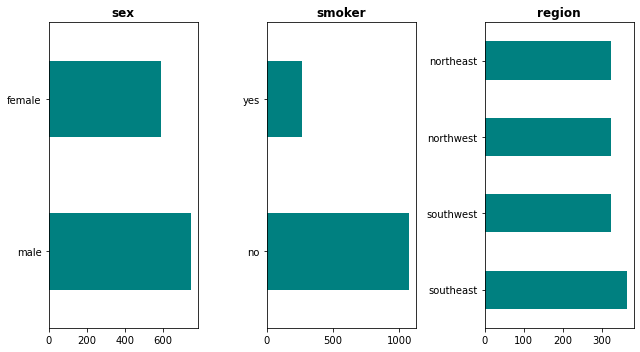

In [82]:
# Gráfico para cada variable cualitativa

fig, axes = plt.subplots(1, 3, figsize = (9,5))

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i], color="teal")
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

In [65]:
# Función para obtener la distribución porcentual de los valores en las variables no numéricas

def porcentajes_variables_nonum(lista_columnas, dataframe):

    for col in lista_columnas:
        porcentajes = (dataframe[col].value_counts() / len(dataframe)) * 100
        porcentajes_redondeados = round(porcentajes, 2)
        print(f"% valores columna: {col}")
        print(porcentajes_redondeados)
        print(f" ")


In [66]:
columnas_nonum=["sex", "smoker","region"]

porcentajes_variables_nonum(columnas_nonum,df)

% valores columna: sex
male      55.83
female    44.17
Name: sex, dtype: float64
 
% valores columna: smoker
no     79.9
yes    20.1
Name: smoker, dtype: float64
 
% valores columna: region
southeast    27.20
southwest    24.29
northwest    24.29
northeast    24.22
Name: region, dtype: float64
 


#### Análisis de los cargos según la columna smoker

In [77]:
fumadores_agrupado = df.groupby('smoker')['charges'].mean()
fumadores_agrupado

smoker
no      8544.746465
yes    32063.771057
Name: charges, dtype: float64

In [78]:
df_fumadores = df.loc[df['smoker'] == 'yes']
df_no_fumadores = df.loc[df['smoker'] == 'no']


In [79]:
df_fumadores.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
age,269.0,38.397078,13.184404,18.0000,27.00000,39.171927,47.0000,64.00000
bmi,269.0,30.683844,6.320866,17.1950,26.03000,30.495000,35.2000,52.58000
children,269.0,1.096654,1.138680,0.0000,0.00000,1.000000,2.0000,5.00000
charges,269.0,32063.771057,11582.869430,12829.4551,20773.62775,34472.841000,41034.2214,63770.42801


In [80]:
df_no_fumadores.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
age,1069.0,39.366908,13.368139,18.0000,28.0000,39.171927,50.00000,64.00000
bmi,1069.0,30.668935,6.017611,15.9600,26.4000,30.400000,34.40000,53.13000
children,1069.0,1.094481,1.222241,0.0000,0.0000,1.000000,2.00000,5.00000
charges,1069.0,8544.746465,6213.766198,1121.8739,3994.1778,7358.175650,11394.06555,43753.33705


In [81]:
df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.171927,13.332170,18.0000,28.00000,39.171927,50.000000,64.00000
bmi,1338.0,30.671933,6.077385,15.9600,26.31500,30.400000,34.595000,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000000,2.000000,5.00000
charges,1338.0,13273.160228,12109.976231,1121.8739,4740.28715,9382.033000,16639.912515,63770.42801


En el análisis anterior observamos que la diferencia en la media de cargos entre el dataset que contiene a los fumadores y el que contiene a los no fumadores es considerable. Por lo que podemos concluir que aquellas personas que fumen por norma general supondrán un coste mayor que aquellas que no lo hagan.
Comparando estos resultados con los iniciales vemos que ese 20% de fumadores que contiene el set de datos afecta de forma significativa a la media global.

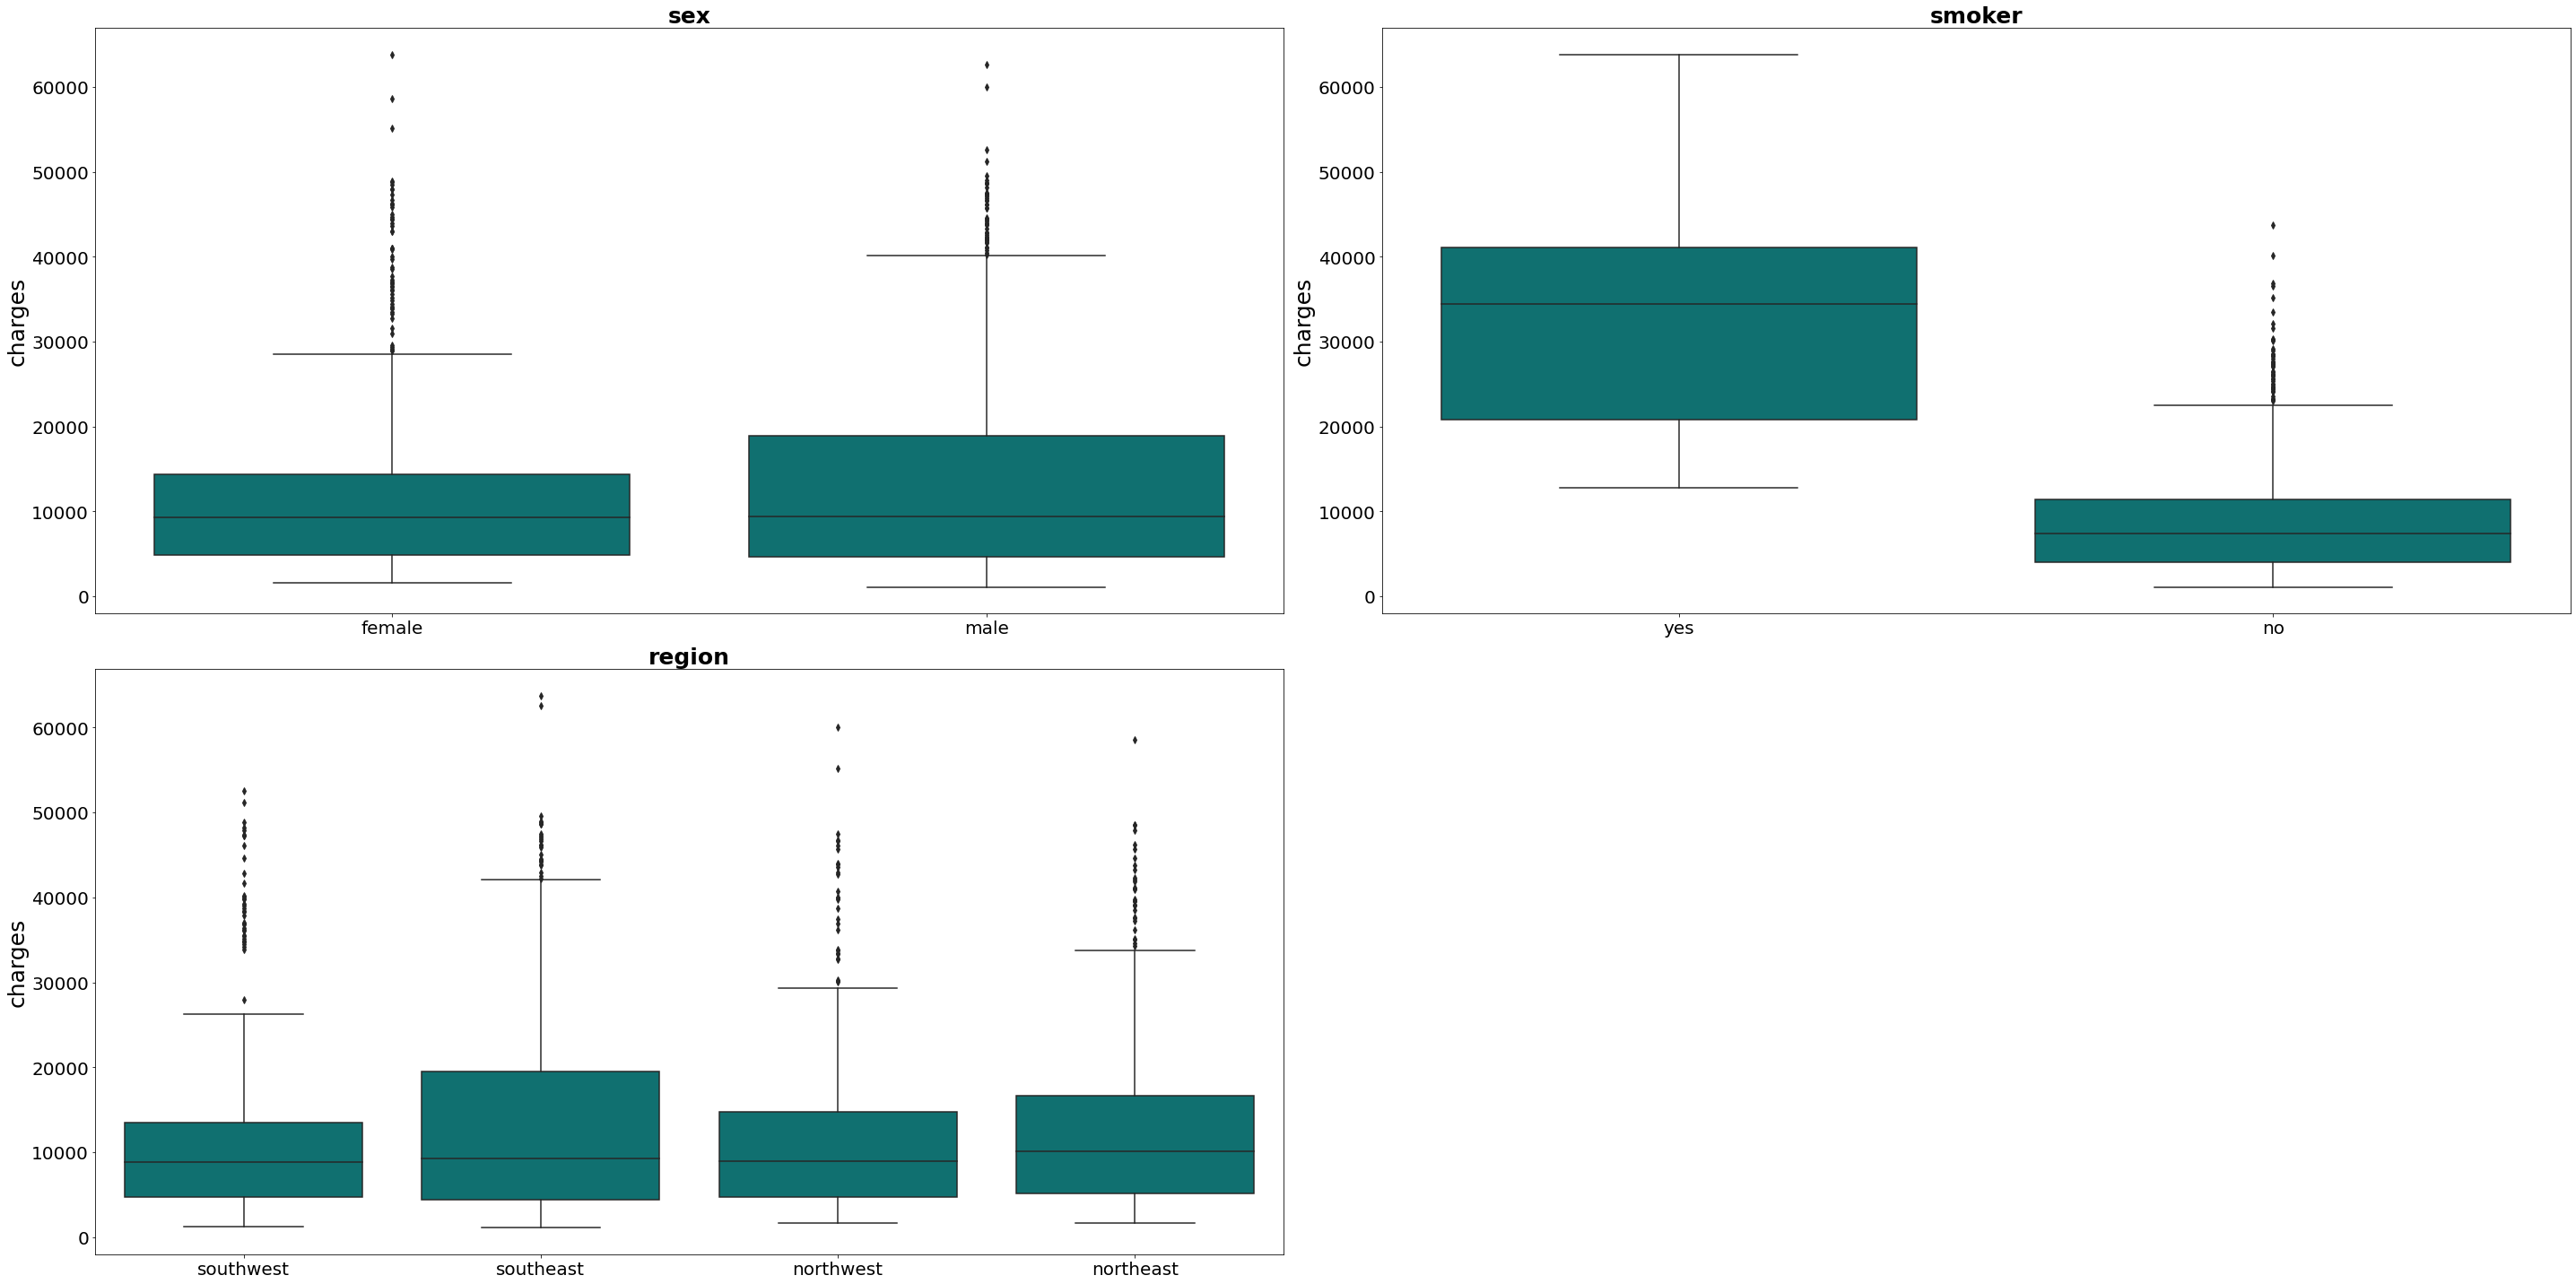